# Starbucks Product Analysis & Prediction
In this project, firstly i will try to analysis the Starbucks Product Nutrition Value dataset which i get from kaggle and then try to make prediction with DecisionTreeClassifier. Let's start with import neccesarry libraries.

In [ ]:
# Libraries for dataset
import pandas as pd
import numpy as np

In [ ]:
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# Create pandas data frame
df = pd.read_csv("starbucks.csv", index_col=0)

# Create a numeric data frame to make correlations
numeric_df = df.select_dtypes(include=['number'])

In [ ]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain-Roll,350,8.0,67,5,10,bakery
2,Apple-Bran-Muffin,350,9.0,64,7,6,bakery
3,Apple-Fritter,420,20.0,59,0,5,bakery
4,Banana-Nut-Loaf,490,19.0,75,4,7,bakery
5,Birthday-Cake-Mini-Doughnut,130,6.0,17,0,0,bakery


In [ ]:
numeric_df.head()

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [ ]:
# Find number of items in dataset
df["item"].nunique()

77

In [ ]:
# Find names of items in dataset
df["item"].unique()

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [ ]:
# Find how many of each item there are in dataset
df.groupby("type")["item"].count()

,item
type,
bakery,41
bistro box,8
hot breakfast,8
parfait,3
petite,9
salad,1
sandwich,7


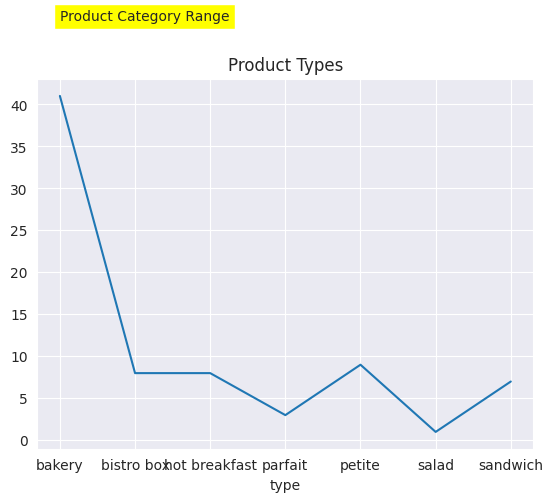

In [ ]:
# Visualize how many of each item there are in dataset
df.groupby("type")["item"].count().plot()
plt.title("Product Types")
plt.text(0.,50,"Product Category Range",bbox=dict(facecolor='yellow', alpha=1))
plt.show()

<ipython-input-18-59329f4b4ca5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set1")


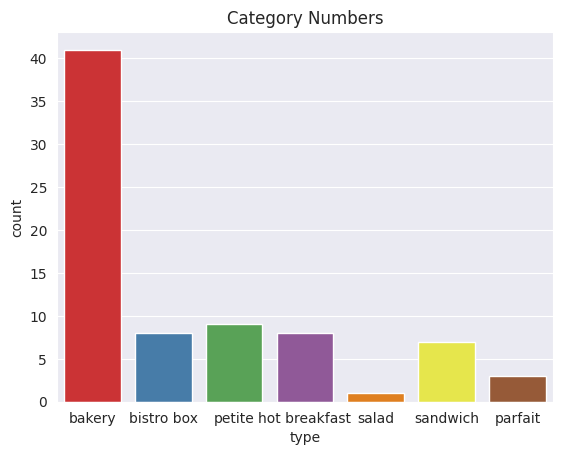

In [ ]:
# Visualize category numbers
sns.countplot(x="type", data=df, palette="Set1")
plt.title("Category Numbers")
plt.show()

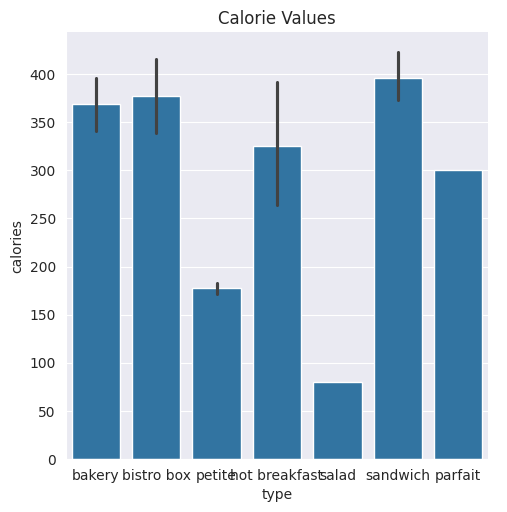

In [ ]:
# Visualize calorie values
sns.catplot(kind="bar",x="type",y="calories",data=df)
plt.title("Calorie Values")
plt.show()

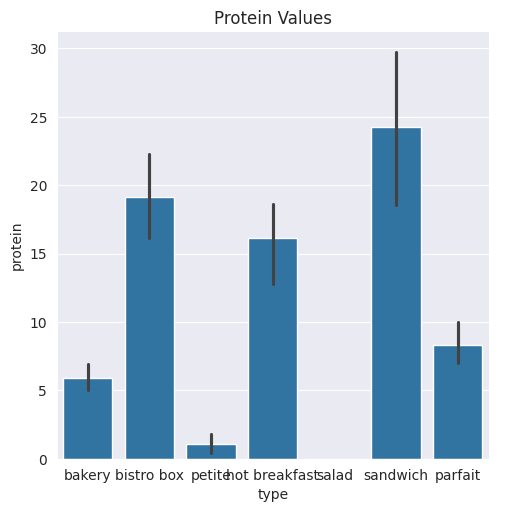

In [ ]:
# Visualize protein values
sns.catplot(kind="bar",x="type",y="protein",data=df)
plt.title("Protein Values")
plt.show()

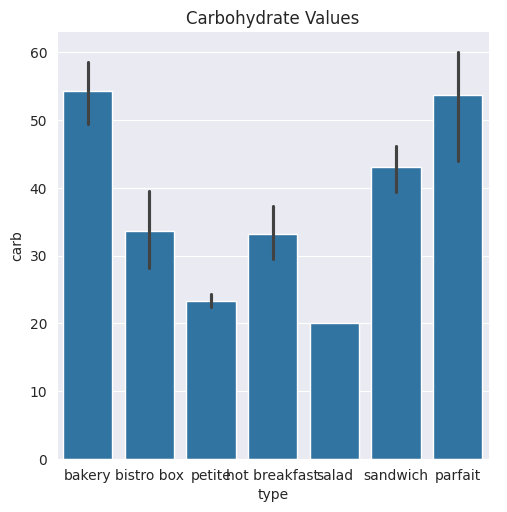

In [ ]:
# Visualize carbohydrate values
sns.catplot(kind="bar",x="type",y="carb",data=df)
plt.title("Carbohydrate Values")
plt.show()

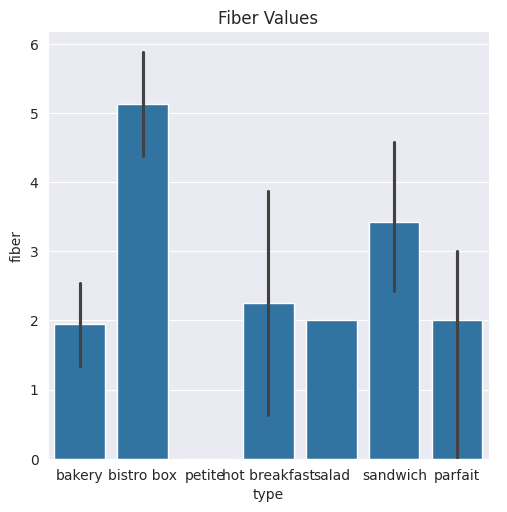

In [ ]:
# Visualize fiber values
sns.catplot(kind="bar",x="type",y="fiber",data=df)
plt.title("Fiber Values")
plt.show()

In [ ]:
# Look at the correlation distribution in the dataset
numeric_df.corr()

,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


<Axes: >

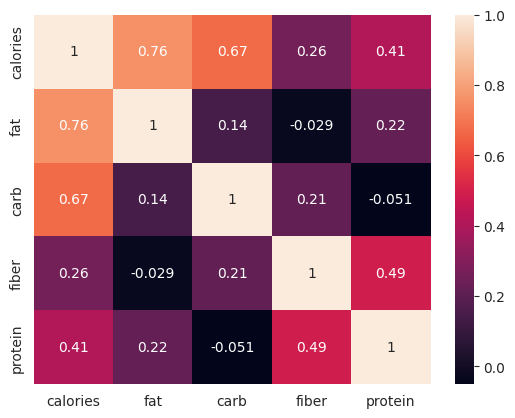

In [ ]:
# Visualize the correlation distribution in the dataset with a heat map
sns.heatmap(numeric_df.corr(),annot=True)

[]

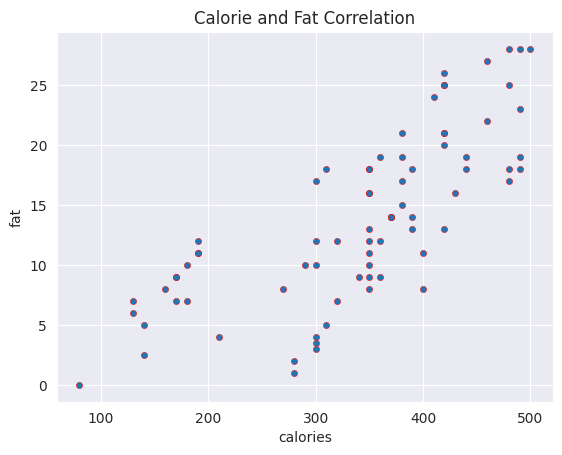

In [ ]:
# Visualize the correlation between calories and fat
plt.title("Calorie and Fat Correlation")
sns.scatterplot(x="calories",y="fat",data=df,s=20,edgecolor="red")
plt.plot()

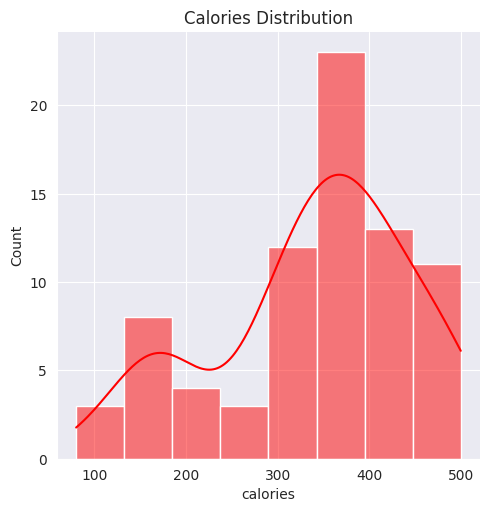

In [ ]:
# Visualize the distribution of calories
sns.displot(x="calories",data=df,color="red",kde=True)
plt.title("Calories Distribution")
plt.show()

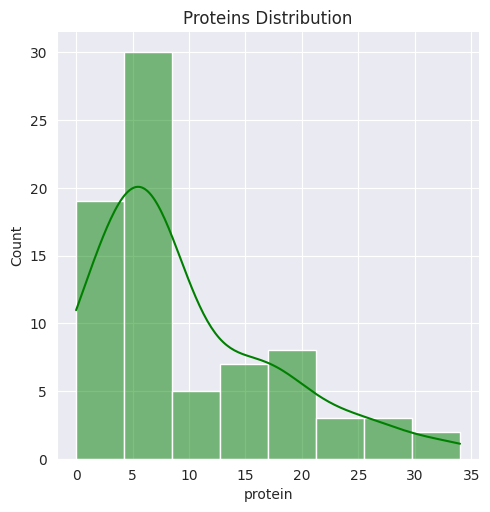

In [ ]:
# Visualize the distribution of proteins
sns.displot(x="protein",data=df,color="green",kde=True)
plt.title("Proteins Distribution")
plt.show()

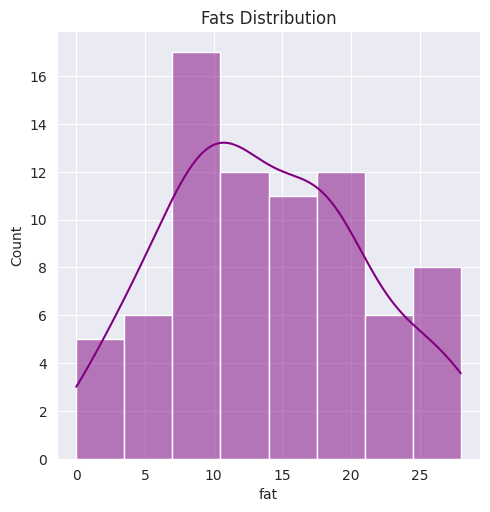

In [ ]:
# Visualize the distribution of fats
sns.displot(x="fat",data=df,color="purple",kde=True)
plt.title("Fats Distribution")
plt.show()

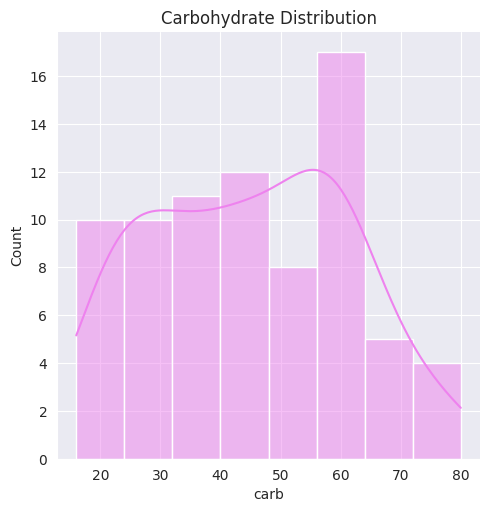

In [ ]:
# Visualize the distribution of carbohydrates
sns.displot(x="carb",data=df,color="violet",kde=True)
plt.title("Carbohydrate Distribution")
plt.show()

# Modelling
Lets start with importing libraries to modelling step.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define dependent and independent variables
X=df[["calories", "fat", "carb", "fiber", "protein"]]
y=df["type"]

In [ ]:
X

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [ ]:
y

,type
1,bakery
2,bakery
3,bakery
4,bakery
5,bakery
...,...
73,sandwich
74,sandwich
75,parfait
76,parfait


In [ ]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Setup model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
# Lets look models accuracy
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [ ]:
# Define a variable to make a prediction
prediction = model.predict([[250, 2, 40, 7, 9]])

In [ ]:
print("Prediction:", prediction)

Prediction: ['parfait']


# Model Tree
Let's import sklearn library to create the model tree.

In [ ]:
from sklearn.tree import plot_tree

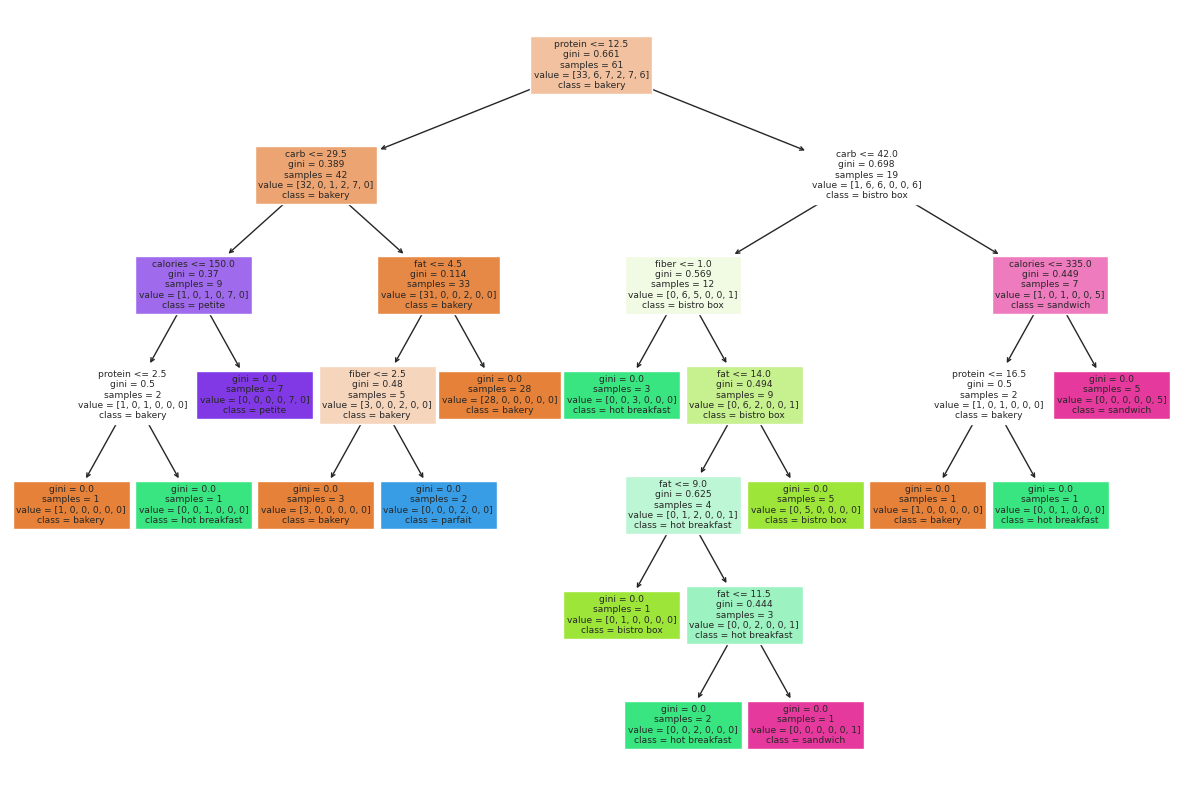

In [ ]:
# Visualize model tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()